In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from lec4 import Particle

In [2]:
def plot_size(size):
    """Sets the current plot size to the chosen value"""
    plt.rcParams['figure.figsize'] = size

In [3]:
def LJForce(r1, r2, L=8):
    """
    Computes the force applied to the r1 particle, considering the boundary loop conditions.
    """
    new_r2 = min([r2 + L*change
                  for change
                  in [np.array([x, y]) for x in [-1, 0, 1] for y in [-1, 0, 1]]
                 ], key=lambda nr2: np.linalg.norm(r1-nr2)
                )
    
    d = np.linalg.norm(r1 - new_r2)
    
    return 48*((1/d**14) - 0.5 * (1/d)**8) * (r1 - new_r2)

In [4]:
def plot_particles(particles, radius=.025, fname=None, show=True):

    #plot_size((3, 3))
    fig, ax = plt.subplots()
    plt.xlim(0, 8);plt.ylim(0,8);
    
    for particle in particles:
        color = plt.cm.summer(np.square(particle.momentum).sum())
        circle = plt.Circle(xy=particle.position, radius=radius, color=color)
        ax.add_artist(circle)
        
    if fname is not None:
        plt.savefig(fname)
        
    if show: 
        plt.show()
    
    #return ax

In [5]:
def initialize_particles(nx=10, ny=10, delta=.1):
    """Initializes the particles on a grid, with random velocities."""
    particles = [
        Particle(r0 = (delta/2) + np.array([delta * i, delta * j]), 
                 p0 = np.random.rand(2) - .5,
                 F = np.zeros(2)
                )
        for i in range(nx)
        for j in range(ny)
    ]
    
    return particles

In [6]:
def apply_bounds(particles, sizex=8, sizey=8):
    for particle in particles:
        particle.position = particle.position % np.array([sizex, sizey])

def time_step(particles, forces):
    for i, particle in enumerate(particles):
        particle.evolve_frog(F=forces[i])

In [7]:
def get_forces(particles):
    forces = []
    for i, particle1 in enumerate(particles):
        force = np.zeros(2)
        for particle2 in particles[:i] + particles[i+1:]:
            force += LJForce(particle1.position, particle2.position)
        forces.append(force)
        
    return forces

In [64]:
get_forces(particles)

[array([ -2.12742539,  17.07988977]),
 array([ 0.10363319, -0.0391365 ]),
 array([  0.8769424 , -16.81903561]),
 array([ 0.85008232, -0.73849392]),
 array([ -4.19097842,  12.55432233]),
 array([-0.07455172, -0.02880491]),
 array([-2.10566325,  0.79972265]),
 array([-18.74305805,  -3.99155603]),
 array([-1.34309811, -2.0509378 ]),
 array([ 18.6888932 ,   4.03189862]),
 array([  9.89678028, -31.35691753]),
 array([-0.28937827, -2.40195656]),
 array([  6.20627973, -10.79337228]),
 array([ -8.8120032 ,  31.84914635]),
 array([ 0.02463461,  0.11299701]),
 array([ 1.03891068,  1.7922344 ])]

In [11]:
def ensemble_temp(particles):
    N = len(particles)
    T = (1./N) * sum([np.linalg.norm(particles[i].momentum)**2 for i in range(N)])
    return T

def get_forces_pres(particles):
    forces = []
    for i, particle1 in enumerate(particles):
        force = []
        for particle2 in particles[:i] + particles[i+1:]:
            force.append(LJForce(particle1.position, particle2.position))
        forces.append(force)
        
    return np.array(forces)

def ensemble_pres(particles):
    N = len(particles)
    Fs = get_forces_pres(particles)
    T = ensemble_temp(particles)
    V = 8*8.
    
    pres = N*T/V + (1/3*V) * np.sum([
            np.sum(np.dot(Fs[i], particles[i].position))
            for i in range(16)
        ])
    
    return pres
    

In [8]:
plot_size((5,5))

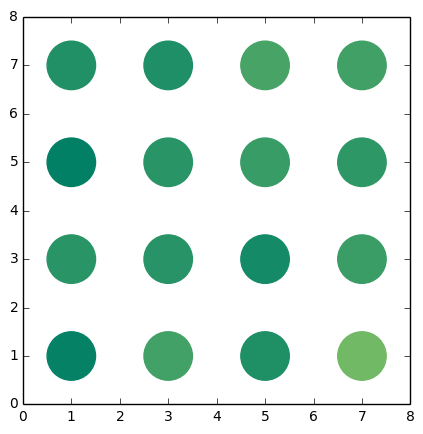

In [57]:
particles = initialize_particles(4, 4, delta=2)
plot_particles(particles, radius=.5)

In [58]:
T_init = ensemble_temp(particles)
T_init

0.17787741393589412

In [59]:
for particle in particles:
    particle.momentum *= np.sqrt(2.5/T_init)

In [60]:
ensemble_temp(particles)

2.4999999999999996

In [63]:
%%time
FREQ = 100
T_list = []
P_list = []
for step in range(10001):
    
    # Apply the update
    forces = get_forces(particles)
    
    time_step(particles, forces=forces)
    apply_bounds(particles)
    # End of update
    
    T = ensemble_temp(particles)
    P = ensemble_pres(particles)
    
    T_list.append(T)
    P_list.append(P)
    
    # Plotting (if necessary)
    if not step % FREQ:
        print("Step {}".format(step))
        plot_particles(particles,
                       radius=.5,
                       fname='animation3/frame{}.png'.format(str(step//FREQ).rjust(4, '0')),
                       show=False)
        plt.close()

        

#plot_particles(particles)

Step 0
Step 100
Step 200
Step 300
Step 400
Step 500
Step 600
Step 700
Step 800
Step 900
Step 1000
Step 1100
Step 1200
Step 1300
Step 1400
Step 1500
Step 1600
Step 1700
Step 1800
Step 1900
Step 2000
Step 2100
Step 2200
Step 2300
Step 2400
Step 2500
Step 2600
Step 2700
Step 2800
Step 2900
Step 3000
Step 3100
Step 3200
Step 3300
Step 3400
Step 3500
Step 3600
Step 3700
Step 3800
Step 3900
Step 4000
Step 4100
Step 4200
Step 4300
Step 4400
Step 4500
Step 4600
Step 4700
Step 4800
Step 4900
Step 5000
Step 5100
Step 5200
Step 5300
Step 5400
Step 5500
Step 5600
Step 5700
Step 5800
Step 5900
Step 6000
Step 6100
Step 6200
Step 6300
Step 6400
Step 6500
Step 6600
Step 6700
Step 6800
Step 6900
Step 7000
Step 7100
Step 7200
Step 7300
Step 7400
Step 7500
Step 7600
Step 7700
Step 7800
Step 7900
Step 8000
Step 8100
Step 8200
Step 8300
Step 8400
Step 8500
Step 8600
Step 8700
Step 8800
Step 8900
Step 9000
Step 9100
Step 9200
Step 9300
Step 9400
Step 9500
Step 9600
Step 9700
Step 9800
Step 9900
Step 10000
C

In [61]:
ensemble_pres(particles)

-3.1370062081054706